
https://www.worldometers.info/coronavirus/

In [1152]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import lxml.html as lh
import pandas as pd
import copy 
url= 'https://www.worldometers.info/coronavirus'
page = requests.get(url)
doc = lh.fromstring(page.content)
table_data = doc.xpath('//td')

In [1153]:
new_list = []
for t in table_data:
    new_list.append(t.text_content())

In [1154]:
country_data = []
count = 0
while (count <= len(new_list)-8):
    i = 0
    holder = []
    while (i <= 8):
        holder.append(new_list[count+i])
        i += 1
    country_data.append(holder)
    count += 9

In [1155]:
list_header = [['Country_Other','Total_Cases','New_Cases','Total_Deaths','New_Deaths','Total_Recovered',
                'Active_Cases','Serious_Critical','Total_Cases/1M_pop']]
uncleaned_data = list_header + country_data

In [1156]:
def type_cleaner(given_list,i,j):
    if (str(given_list[i][j]).strip() != ''):
        value = str(given_list[i][j]).replace("+", "")
        created = value.replace(",", "")
        new_value = int(created)
        final_value = new_value
        given_list[i][j] = final_value
    else:
        given_list[i][j] = None
    return None
for i in range(1,len(uncleaned_data)):
    type_cleaner(uncleaned_data,i,1)
    type_cleaner(uncleaned_data,i,2)
    type_cleaner(uncleaned_data,i,3)
    type_cleaner(uncleaned_data,i,4)
    type_cleaner(uncleaned_data,i,5)
    type_cleaner(uncleaned_data,i,6)
    type_cleaner(uncleaned_data,i,7)
for i in range(1,len(uncleaned_data)):
    uncleaned_data[i][0] = str(uncleaned_data[i][0]).strip()
for i in range(1,len(uncleaned_data)):
    if uncleaned_data[i][0] == 'USA':
        uncleaned_data[i][0] = 'United States of America'

In [1157]:
column_names= ['Country_Other','Total_Cases','New_Cases','Total_Deaths','New_Deaths','Total_Recovered',
               'Active_Cases','Serious_Critical','Total_Cases/1M_pop']
df = pd.DataFrame(uncleaned_data[1:],columns =column_names)

In [1158]:
df_country_data = df.filter(['Total_Cases','New_Cases','Total_Deaths','New_Deaths','Total_Recovered',
               'Active_Cases','Serious_Critical','Total_Cases/1M_pop'], axis=1)
df_country_names = pd.DataFrame(df.astype(str)['Country_Other'])
data = pd.concat([df_country_names, df_country_data],axis = 1)

In [1159]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas
import math

In [1160]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [1161]:
data['log_data_cases'] = None
for i in range(0,len(data['Total_Cases'])):
    value = copy.deepcopy(data['Total_Cases'].loc[i])
    returned = int(math.log(value))
    data['log_data_cases'].loc[i] = copy.deepcopy(returned)

C:\Users\tedma\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


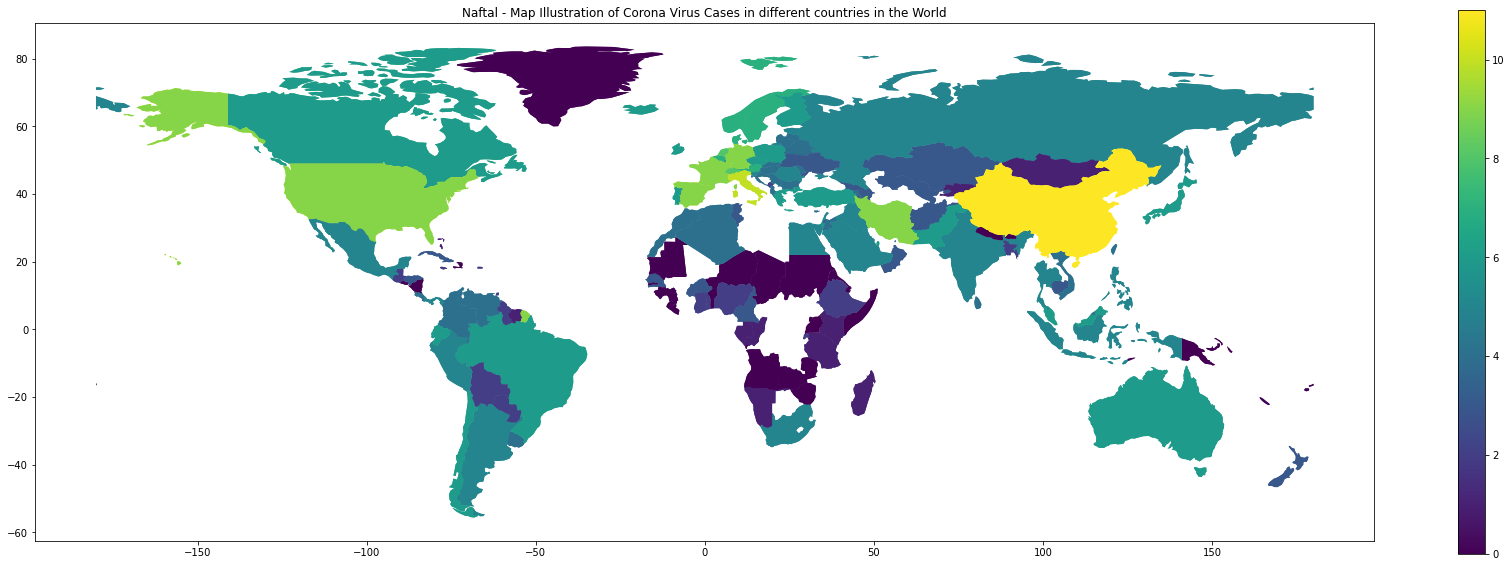

In [1162]:
merged_inner = pd.merge(left=world, right=data, left_on=world.name, right_on=data.Country_Other)
merged_inner.plot(column = "log_data_cases",legend = True,label = 'Log of the Total Cases',cmap = 'viridis',figsize=(30,10))
plt.title("Naftal - Map Illustration of Corona Virus Cases in different countries in the World")
plt.show()

In [1163]:
canada = "https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html"
page = requests.get(canada)
info = lh.fromstring(page.content)
table_info= info.xpath('//td')

In [1164]:
canada_data = []
for t in table_info:
    canada_data.append(t.text_content())

In [1165]:
usable_data = []
usable_data = canada_data[0:60]

In [1166]:
def clean_canada(list_data,i):
    value = str(list_data[i])
    new_value = value.strip()
    replace_val = new_value.replace(",","")
    int_value = int(replace_val)
    list_data[i] = int_value

In [1167]:
for i in range(0,len(usable_data)):
    if (i % 4 != 0):
        clean_canada(usable_data,i)

In [1168]:
#create a 2d list for the canada data 
list_canada = []
count = 0
while (count < len(usable_data)):
    holder = []
    selector = 0
    while (selector <= 3):
        holder.append(usable_data[count+selector])
        selector += 1
    list_canada.append(holder)
    count += 4

In [1169]:
list_canada

[['British    Columbia', 348, 0, 9],
 ['Alberta', 195, 0, 1],
 ['Saskatchewan', 8, 18, 0],
 ['Manitoba', 17, 0, 0],
 ['Ontario', 311, 0, 2],
 ['Quebec', 139, 0, 1],
 ['Newfoundland    and Labrador', 3, 1, 0],
 ['New    Brunswick', 7, 4, 0],
 ['Nova    Scotia', 5, 10, 0],
 ['Prince    Edward Island', 2, 0, 0],
 ['Yukon', 0, 0, 0],
 ['Northwest    Territories', 0, 0, 0],
 ['Nunavut', 0, 0, 0],
 ['Repatriated travellers', 13, 0, 0],
 ['Total', 1048, 33, 13]]

In [1170]:
columns_canada = ['Province','Positive_Cases','Probable_Cases','Deaths']
corona_canada = pd.DataFrame(list_canada[0:len(list_canada)-1],columns = columns_canada)
corona_canada

,Province,Positive_Cases,Probable_Cases,Deaths
0,British Columbia,348,0,9
1,Alberta,195,0,1
2,Saskatchewan,8,18,0
3,Manitoba,17,0,0
4,Ontario,311,0,2
5,Quebec,139,0,1
6,Newfoundland and Labrador,3,1,0
7,New Brunswick,7,4,0
8,Nova Scotia,5,10,0
9,Prince Edward Island,2,0,0


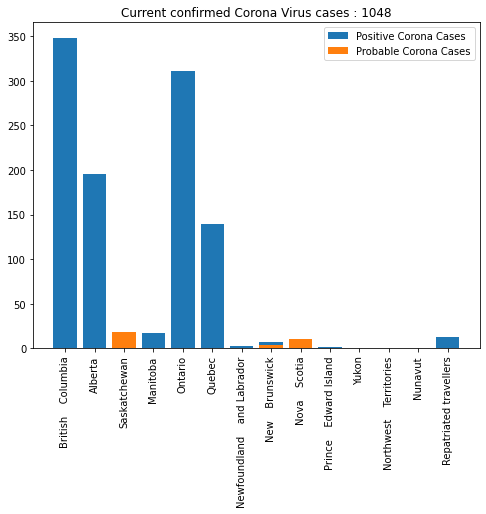

In [1171]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(corona_canada['Province'],corona_canada['Positive_Cases'],label='Positive Corona Cases')
ax.bar(corona_canada['Province'],corona_canada['Probable_Cases'],label='Probable Corona Cases')
plt.xticks(rotation=90)
plt.title("Current confirmed Corona Virus cases : %s"%list_canada[14][1])
ax.legend(loc='upper right')
plt.show()